In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Notebook Summary

This notebook summarises and implements the paper: Rahimi, A., & Recht, B. (2008). Random features for large-scale kernel machines. In Advances in neural information processing systems (pp. 1177-1184). Important points are pulled directly from the paper and not necessarily reworded.

## Introduction

Kernel machines are attractive because they can approximate any function or decision boundary arbitrarily well with enough training data. However, methods that operate on the kernel matrix (gram matrix) of the data scale poorly with the size of the training dataset.

One can take advantage of the speed of linear training algorithms for training nonlinear machines by approximately factoring the kernel matrix and treating the columns of the factor matrix as features in a linear machine. Random fourier features is a factorisation of the kernel function itself, which does not depend on the data. It allows for the conversion of the training and evaluation of the kernel machine into the corresponding operations of a linear machine by mappng data into a relatively low-dimensional randomised feature space. 

The kernel trick generates features for algorithms that depend only on the inner product between pairs of input points. Any positive definite function $k(\mathbf{x},\mathbf{y})$ with $\mathbf{x},\mathbf{y}\in \mathcal{R}^{d}$ defines an inner product and a lifting $\phi$ so that the inner product between lifted datapoints can be quickly computed as $\langle\phi(\mathbf{x}),\phi(\mathbf{y})\rangle= k(\mathbf{x}, \mathbf{y})$. The cost of this is that the algorithm can only access the data through evaluations of $\kappa(\mathbf{x},\mathbf{y})$ - large data sets incur large computational and storage costs. 

The paper proposes explicitly mapping the data to a low-dimensional Euclidean inner product space using a randomised feature map $\mathbf{z} : \mathcal{R}^{d} \rightarrow \mathcal{R}^{D}$ so that the inner product between a pair of transformed points approximates the kernel function.

$$k(\mathbf{x}, \mathbf{y})=\langle\phi(\mathbf{x}), \phi(\mathbf{y})\rangle \approx \mathbf{z}(\mathbf{x})^{\prime} \mathbf{z}(\mathbf{y}).$$

## Random Fourier Features

The random features project data points onto a randomly chosen line and then pass the resulting scalar through a sinusoid. The random lines are drawn from a distribution so as to guarantee that the inner product of the two transformed points approximates the desired $\textbf{shift-invariant}$ kernel. 

For a properly scaled kernel $\kappa(\Delta)$, Bochner's theorem gaurantees that its Fourier transform $p(\omega)$ is a proper probability distribution. 

| Kernel Name | $k(\Delta)$ <img width=100/>| $p(\omega)$ <img width=100/>|
| --- | --- | --- |
| Gaussian | $e^{-\frac{\|\Delta\|_{2}^{2}}{2}}$ | $(2\pi)^{-\frac{D}{2}}e^{-\frac{\|\omega\|_{2}^{2}}{2}}$ |
| Laplacian | $e^{-\|\Delta\|_{1}}$ | $\prod_{d} \frac{1}{\pi\left(1+\omega_{d}^{2}\right)}$ |
| Cauchy | $\prod_{d} \frac{2}{1+\Delta_{d}^{2}}$ | $e^{-\|\Delta\|_{1}}$ |

Defining $\zeta_{\omega}(\mathbf{x})=e^{j \omega^{\prime} \mathbf{x}}$, we have

$$k(\mathbf{x}-\mathbf{y})=\int_{\mathcal{R}^{d}} p(\omega) e^{j \omega^{\prime}(\mathbf{x}-\mathbf{y})} d \omega=\mathbb{E}_{\omega}\left[\zeta_{\omega}(\mathbf{x}) \zeta_{\omega}(\mathbf{y})^{*}\right]$$

so $\zeta_{\omega}(\mathbf{x}) \zeta_{\omega}(\mathbf{y})^{*}$ is an unbiased estimate of $k(\mathbf{x}, \mathbf{y})$.

To obtain a real-valued random feature for $k$, the integrand of $e^{j \omega^{\prime}(\mathbf{x}-\mathbf{y})}$ becomes $\cos \omega^{\prime}(x-y)$. Defining $ z_{w}(x)=[\cos (x) \sin (x)]^{\prime}$, which satisfies $E\left[z_{\omega}(\mathbf{x})^{\prime} z_{\omega}(\mathbf{y})\right] = k(\mathbf{x}, \mathbf{y})$ because $ z_{\omega}(\mathbf{x})^{\prime} z_{\omega}(\mathbf{y})=\cos \omega^{\prime}(\mathbf{x}-\mathbf{y})$. 

The mapping used here, which also satisfies the condition $E\left[z_{\omega}(\mathbf{x})^{\prime} z_{\omega}(\mathbf{y})\right]=k(\mathbf{x}, \mathbf{y})$ is

$$
z_{\omega}(\mathbf{x})=\sqrt{2} \cos \left(\omega^{\prime} \mathbf{x}+b\right)
$$

where $\omega$ is drawn from $p(\omega)$ and $b$ is drawn from a unifrom distribution between $[0, 2\pi]$.

The variance of $z_{\omega}(\mathbf{x})^{\prime} z_{\omega}(\mathbf{y})$ can be lowered by concatenating $D$ randomly chosen $z_{\omega}$ into a column vector $\mathbf{z}$ and normalising each component by $\sqrt{D}$. The inner product of points featurised by the 2$D$-dimensional random feature $\mathbf{z}$,  $\mathbf{z}(\mathbf{x})^{\prime} \mathbf{z}(\mathbf{y})=\frac{1}{D} \sum_{j=1}^{D} z_{\omega_{j}}(\mathbf{x}) z_{\omega_{j}}(\mathbf{y})$ is a sample average of $z_{\omega_{j}}(\mathbf{x}) z_{\omega_{j}}(\mathbf{y})$ and is therefore a lower variacne approximation to the expectation.

## Algorithm

1. Compute the Fourier transform $p$ of the positive definite shift-invariant kernel $k(\mathbf{x}, \mathbf{y})=k(\mathbf{x}-\mathbf{y})$

$$
p(\omega)=\frac{1}{2 \pi} \int e^{-j \omega^{\prime} \Delta} k(\Delta) d \Delta
$$

2. Draw $D$ iid vectors $\omega_{1}, \cdots, \omega_{D} \in \mathcal{R}^{d}$ from $p$.

3. Draw $D$ iid vectors $b$ from the uniform distribution between $[0, 2\pi]$.

4. Compute the random Fourier features

$$
\mathbf{z}(\mathbf{x}) \equiv \sqrt{\frac{2}{D}}\left[\cos \left(\omega_{1}^{\prime} \mathbf{x}+b_{1}\right) \cdots \cos \left(\omega_{D}^{\prime} \mathbf{x}+b_{D}\right) \sin \left(\omega_{1}^{\prime} \mathbf{x}+b_{1}\right) \cdots \sin \left(\omega_{D}^{\prime} \mathbf{x}+b_{D}\right)\right]^{\prime}
$$

5. Compute the kernel estimates

$$
k(\mathbf{x}, \mathbf{y}) \approx \mathbf{z}(\mathbf{x})^{\prime} \mathbf{z}(\mathbf{y})
$$

In [163]:
from sklearn.base import BaseEstimator
from sklearn.exceptions import NotFittedError
from sklearn.utils.extmath import safe_sparse_dot

# Random Fourier features class
class KernelRFF(BaseEstimator):
    """
    Approximates the feature map of a kernel by Monte Carlo approximation of 
    it's Fourier transform. Implements random Fourier features [1].
        
    Parameters
    ----------
    gamma : float
        Parameter of the Gaussian kernel exp(-gamma * w^2)
        
    D : int
        Number of Monte Carlo samples per feature
    
    [1] Rahimi, A., & Recht, B. (2008). Random features for large-scale kernel machines. 
        In Advances in neural information processing systems (pp. 1177-1184)
    """
    
    def __init__(self, gamma=1, D=50):
        self.gamma = gamma
        self.D = D # num MC samples
        self.is_fitted = False 
    
    def fit(self, X):
        """
        Draws D samples for direction w and random offset b
        
        X : Data {array, matrix}, shape (n_samples, n_dimension) 
        
        Returns
        -------
        self : object
            Returns the direction vector w, the offset b and the boolean
            fitted.
        """
        
        dimension = X.shape[1] # dimension of the data
        self.w_direction = np.sqrt(2 * self.gamma) * \
                            np.random.normal(size=(self.D, dimension))
        self.b_offset = np.random.uniform(0, 2*np.pi, size=(1, self.D))
        self.is_fitted = True
        
        return self
    
    def _transform(self, X):
        """
        Apply the approximate feature map to X.
        
        Parameters
        ----------
        X : Data {array, matrix}, shape (n_samples, n_features)
        
        Returns
        -------
        Z : array of transformed features, shape (n_samples, n_components [D])
        """
        Xw = X.dot(self.w_direction.T)
        Z = np.sqrt(2 / self.D) * np.cos(Xw + self.b_offset)
        
        return Z
    
    def compute_kernel(self, X, Y=None):
        """
        Computes the kernel gram matrix using the transformed Fourier features
        
        Parameters
        ----------
        X : Data {array, matrix}, shape (n_samples, n_features)
        
        Y : Data {array, matrix}, shape (n_samples, n_features)
        
        Returns
        -------
        K : gram matrix (n_samples, n_samples)
        """
        Zx = self._transform(X)
        
        if Y is not None:
            Zy = self._transform(Y)
            K = Zx.dot(Zy.T)
        else:
            K = Zx.dot(Zx.T)
        
        return K
        

In [169]:
from sklearn.metrics.pairwise import rbf_kernel

# make some data
num_samples, dim = 1000, 50
X = np.random.randn(num_samples, dim)
Y = np.random.randn(num_samples, dim)

# RBF kernel for performance comparison
K_rbf = rbf_kernel(X, Y, gamma=1)
errors = []

# check for a different numbers of MC samples
Ds = np.arange(1,10000,200)
for D in Ds:
    gaussRFF = KernelRFF(gamma=1, D=D)
    gaussRFF.fit(X)
    K_rff = gaussRFF.compute_kernel(X, Y)
    errors.append(((K_rbf - K_rff)**2).mean())

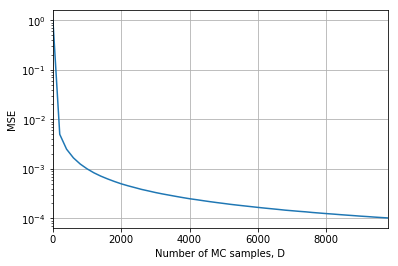

In [170]:
plt.figure(1)
plt.plot(Ds, errors)
plt.grid()
plt.ylabel("MSE")
plt.xlabel("Number of MC samples, D")
plt.yscale("log")
plt.autoscale(enable=True, axis='x', tight=True)